# Mejora de métodos

## Bisección

In [1]:
from math import *

def h(x):
    return (x-3)**3
    
def biseccion(f, intervalo, n):
    """
    PROPÓSITO: calcula el término *n* de la sucesión de                          bisección aplicada a *f* en *intervalo* y los extremos del mismo.
    PRECONDICIONES: f debe tener una única raíz en *intervalo*, ser continua     y f(a)f(b)< 0.
    PARÁMETROS:
        - f. función. La función involucrada.
        - intervalo. Lista =  [a, b]. 
        - n. Entero positivo. El índice del término de la                sucesión de bisección.
    """
    a, b = intervalo
    # inicializamos sucesión y contador
    xn =  a + (b-a)/2
    k =  1
    while k < n:
        if f(a)*f(xn)<0:
            b = xn
        else:
            a = xn
        # actualizamos sucesión y contador    
        xn =  a + (b-a)/2  
        k =  k + 1
    return a, b, xn
    
biseccion(h, [1, 4], 1)

(1, 4, 2.5)

In [2]:
lista1 = [1, 2]
lista2 = ['A', 'B']

zipeado = zip(lista1, lista2)

for elemento in zipeado:
    print(elemento)

(1, 'A')
(2, 'B')


In [3]:
import numpy as np
import pandas as pd

def df_biseccion(f, intervalo, cantidad_iteraciones):
    # guardamos en resultados una lista con las llamadas a biseccion. Cada elemento de la lista es una 3-upla (a, b, xn) 
    resultados = [biseccion(f, intervalo, n) for n in range(1, cantidad_iteraciones)]

    # Armamos los arrays de forma natural
    sucesion_a = np.array([resultado[0] for resultado in resultados])
    sucesion_b = np.array([resultado[1] for resultado in resultados])
    sucesion = np.array([resultado[2] for resultado in resultados])

    # zipeamos las columnas para pasarlas a pandas 
    
    return pd.DataFrame(zip(sucesion_a, sucesion_b, sucesion), columns=["a", "b", "xn"])

test = df_biseccion(h, [-2, 1], 10)

test

,a,b,xn
0,-2.000000,1,-0.500000
1,-0.500000,1,0.250000
2,0.250000,1,0.625000
3,0.625000,1,0.812500
4,0.812500,1,0.906250
5,0.906250,1,0.953125
6,0.953125,1,0.976562
7,0.976562,1,0.988281
8,0.988281,1,0.994141


# Dejamos este código como ejemplo de lo que no hay que hacer (no hay que repetir código)

# Operaciones en df

In [4]:
test

,a,b,xn
0,-2.000000,1,-0.500000
1,-0.500000,1,0.250000
2,0.250000,1,0.625000
3,0.625000,1,0.812500
4,0.812500,1,0.906250
5,0.906250,1,0.953125
6,0.953125,1,0.976562
7,0.976562,1,0.988281
8,0.988281,1,0.994141


In [5]:
## Operaciones en columnas

In [6]:
test[(test.a < 0.9) | (test.b < 1)]

# & para intersección, | para unión, ~ para negación

,a,b,xn
0,-2.0000,1,-0.50000
1,-0.5000,1,0.25000
2,0.2500,1,0.62500
3,0.6250,1,0.81250
4,0.8125,1,0.90625


## Operaciones en filas

In [7]:
test.iloc[2:7]

,a,b,xn
2,0.250000,1,0.625000
3,0.625000,1,0.812500
4,0.812500,1,0.906250
5,0.906250,1,0.953125
6,0.953125,1,0.976562


In [8]:
test.iloc[[2]]

,a,b,xn
2,0.25,1,0.625


In [9]:
test.iloc[[2, 3]]

,a,b,xn
2,0.250,1,0.6250
3,0.625,1,0.8125


In [10]:
# las mismas filas que antes, pero con la condición de que la columna sea la de posición 2
test.iloc[[2, 3], [2]]

,xn
2,0.6250
3,0.8125


## Plots

<Axes: >

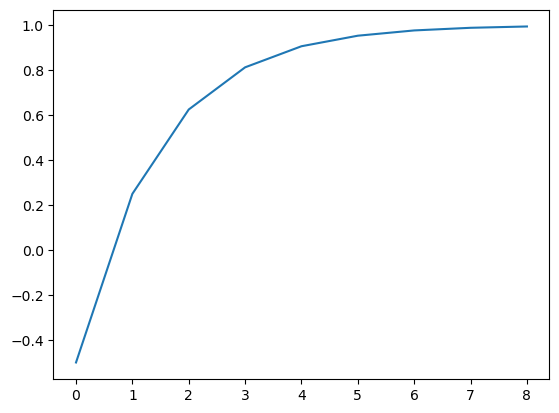

In [11]:
# Por default Pandas plotea la columna en relación al index
test.xn.plot()

In [12]:
## Plotear una columna en relación a otra

<Axes: xlabel='a', ylabel='b'>

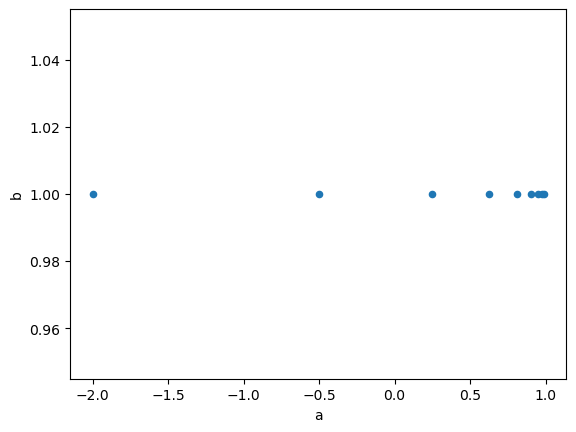

In [13]:
test.plot.scatter('a', 'b')

# Criterio STOP (está feo, abajo lo mejoramos utilizando subtareas)

In [14]:
def h(x):
    return (x-1)**3
    
def biseccion_stop_ugly(f, intervalo, stop):
    """
    PROPÓSITO: calcula la sucesión de bisección aplicada a *f* en *intervalo* y los extremos del mismo hasta que se cumpla el criterio de stop inducido por *stop*.
    PRECONDICIONES: f debe tener una única raíz en *intervalo*, ser continua     y f(a)f(b) < 0.
    PARÁMETROS:
        - f. función. La función involucrada.
        - intervalo. Lista =  [a, b]. 
        - n. Entero positivo. El índice del término de la                sucesión de bisección.
    """
    a, b = intervalo
    # inicializamos sucesión y contador
    xn1 =  a + (b-a)/2
    xn = 1
    k =  1
    
    while abs((xn1 - xn)/ xn1) > stop:
        print(abs((xn1 - xn)/xn1))
        if f(a)*f(xn1)<0:
            b = xn1
        else:
            a = xn1
        # actualizamos sucesión y contador    
        xn = xn1
        xn1 =  a + (b-a)/2  
        k =  k + 1
        print(xn1, xn)
    return a, b, xn1


biseccion_stop_ugly(h,  [0, 5], 0.1)

0.6
1.25 2.5
1.0
0.625 1.25
1.0
0.9375 0.625
0.3333333333333333
1.09375 0.9375
0.14285714285714285
1.015625 1.09375


(0.9375, 1.09375, 1.015625)

# TAREA: ¿Es cierto que si $f$ tiene un único cero en $x=0 \in [a, b]$ y $f(a)f(b) < 0$, entonces el criterio de aproximación de error  relativo

# $\left|\frac{x_{n+1} - x_{n}}{x_{n+1}}\right|$

# falla?

# Hagamos subtareas para mejorar el código de bisección que tiene criterio de stop de error relativo

In [15]:
def error_relativo(xn1, xn):
    return abs((xn1-xn)/xn1)

# print(biseccion(h, [0,5], 2)[2])

def biseccion_stop(f, intervalo, stop):
    i = 1
    xn1 = biseccion(f, intervalo, i + 1)[2]
    xn  = biseccion(f, intervalo, i)[2]
    while error_relativo(xn1, xn) > stop:
        i = i + 1
        xn1 = biseccion(f, intervalo, i + 1)[2]
        xn  = biseccion(f, intervalo, i)[2]
    return xn1
        
biseccion_stop(h, [0, 5], 0.1)

1.015625

# TAREA 2: Si llamamos a bisección_stop (o a cualquiera de las anteriores) con $h = (x-1)^3$ en el intervalo $[0, 4]$ obtenemos un error en el output. Corregirlo.

# TAREA 3: Ahora que nos dimos cuenta que podemos utilizar subtareas para que el código siga las buenas prácticas, ¿será posible definir una función que como output de un df como el anterior, pero con la columna de error relativo como cuarta columna? Intente programarla.

In [16]:
def g(x):
    return cos(x)



def pf(g, x, n):
    """
    PROPÓSITO: calcula el término *n* de la sucesión de punto g(x) aplicada a *f* en *intervalo* y los extremos del mismo.
    """
    i =  1
    while i < n:
        x = g(x)
        i = i + 1
    return x


pf(g, 1, 10)


0.7314040424225098

In [30]:
def df_pf(g, x, cantidad_iteraciones):
    # guardamos en resultados una lista con las llamadas a biseccion. Cada elemento de la lista es una 3-upla (a, b, xn)
    index  = pd.RangeIndex(start = 1, stop =  cantidad_iteraciones + 1)
    return pd.DataFrame(np.array([pf(g, x, n) for n in range(1, cantidad_iteraciones+1)]), columns=["xn"], index = index)

testpf = df_pf(g, 1, 10)

testpf

,xn
1,1.000000
2,0.540302
3,0.857553
4,0.654290
5,0.793480
6,0.701369
7,0.763960
8,0.722102
9,0.750418
10,0.731404


In [53]:
def df_pf_con_error_rel(g, x, cantidad_iteraciones):
    # guardamos en resultados una lista con las llamadas a biseccion. Cada elemento de la lista es una 3-upla (a, b, xn)
    index  = pd.RangeIndex(start = 1, stop =  cantidad_iteraciones + 1)
    # resultados = [pf(g, x, n) for n in range(1, cantidad_iteraciones+1)]
    # errores    = [error_relativo(pf(g, x, n+1),pf(g, x, n) ) for n in range (1, cantidad_iteraciones+1)]
    # zip(resultados, errores)
    return pd.DataFrame(zip([pf(g, x, n) for n in range(1, cantidad_iteraciones+1)], [error_relativo(pf(g, x, n+1),pf(g, x, n) ) for n in range (1, cantidad_iteraciones+1)]), columns=["xn", "error_rel"], index = index) 


df_pf_con_error_rel(g, 1, 10)

#testpf = df_pf(g, 1, 10)

#testpf

,xn,error_rel
1,1.000000,0.850816
2,0.540302,0.369949
3,0.857553,0.310663
4,0.654290,0.175418
5,0.793480,0.131331
6,0.701369,0.081930
7,0.763960,0.057966
8,0.722102,0.037733
9,0.750418,0.025996
10,0.731404,0.017244


<Axes: >

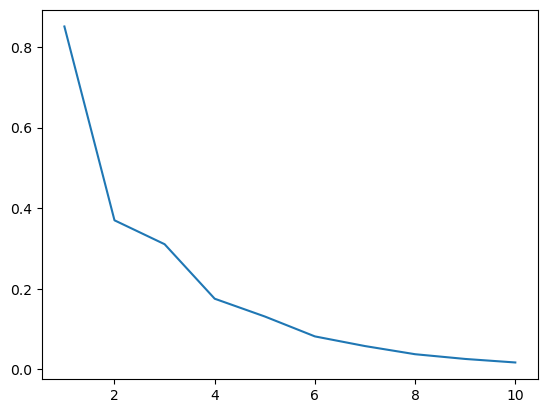

In [54]:
testpf_rel =  df_pf_con_error_rel(g, 1, 10)


testpf_rel.error_rel.plot()

### Una forma de hacer el scatter: agregar al index como columna.

<Axes: xlabel='indice', ylabel='error_rel'>

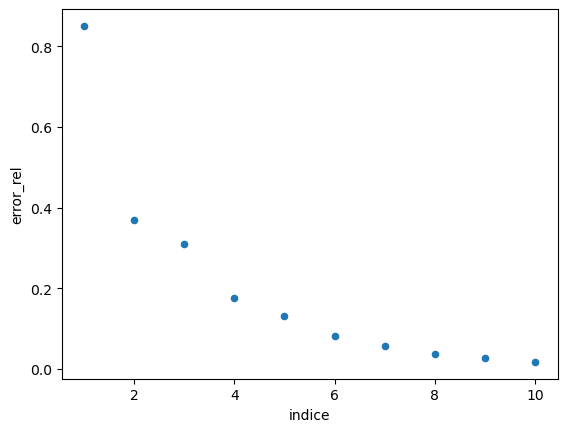

In [60]:
# Esto directamente agrega al final del df la columna que le pasamos del lado izquierdo
testpf_rel['indice'] = testpf_rel.index

testpf_rel.plot.scatter('indice', 'error_rel')

In [61]:
testpf_rel

,xn,error_rel,indice
1,1.000000,0.850816,1
2,0.540302,0.369949,2
3,0.857553,0.310663,3
4,0.654290,0.175418,4
5,0.793480,0.131331,5
6,0.701369,0.081930,6
7,0.763960,0.057966,7
8,0.722102,0.037733,8
9,0.750418,0.025996,9
10,0.731404,0.017244,10
